In [1]:
from aux_train import *
from aux_plot import *
from aux_func_V3 import *
import API_Numpy
import API_TensorFlow

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [2]:
equation=transp_equation
equation=burgers_equation

In [3]:
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal conv3 - 1',equation=equation,WENO_method=WENO_Z)
Sim_DS=Sim_JS

In [11]:
x,u = create_f_points(f_test=f_test_1,Δx=0.01)
x,du = create_f_points(f_test=df_test_1,Δx=0.01)
test_weno=(Sim_JS,Sim_Z,Sim_DS)

ω_plot,α_plot,β_plot,δ_plot=get_inner_val(test_weno,u,FronteiraPeriodica)

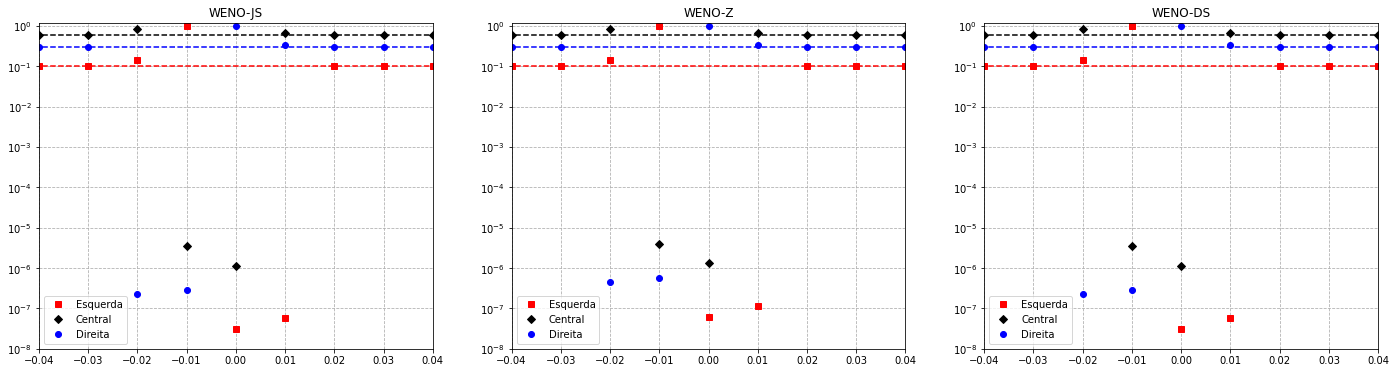

In [12]:
create_compara_plot(x,ω_plot,['WENO-JS','WENO-Z','WENO-DS'],is_log=True,xlim=(-0.04,0.04),ylim=(10**-8,(10**-0+0.2)))

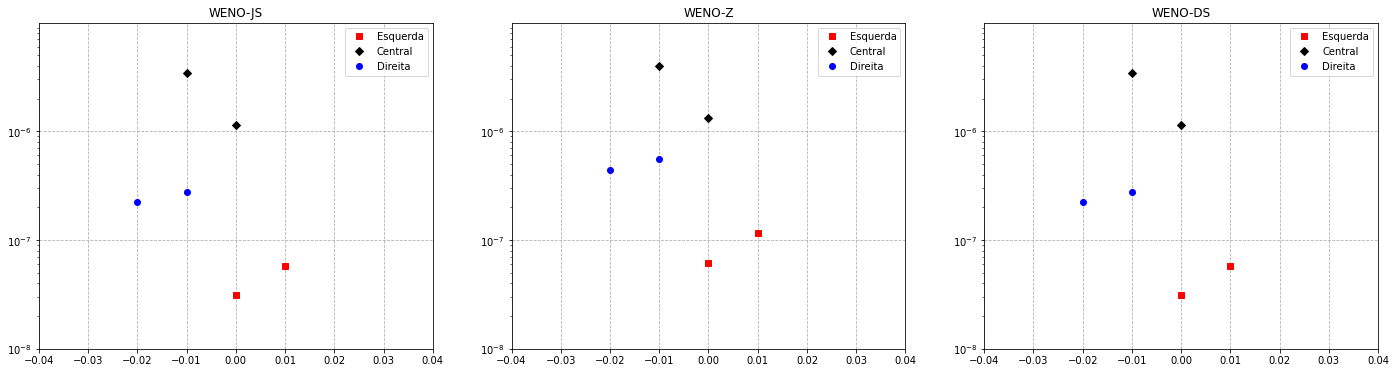

In [13]:
create_compara_plot(x,ω_plot,['WENO-JS','WENO-Z','WENO-DS'],is_log=TRUE,xlim=(-0.04,0.04),ylim=(10**-8,(10**-5)))

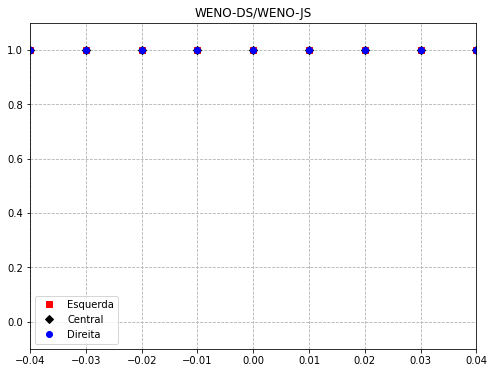

In [16]:
create_compara_plot(x,β_plot[1:2]/β_plot[0:1],['WENO-DS/WENO-JS'],xlim=(-0.04,0.04),is_log=False,hlines=False,ylim=(-0.1,1.1))

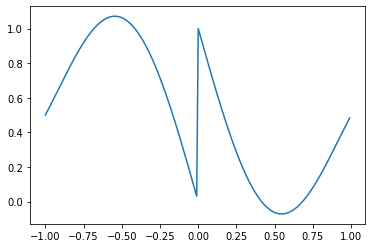

In [24]:
plt.plot(x,np.squeeze(u))

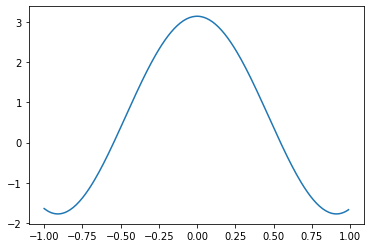

In [26]:
plt.plot(x,-np.squeeze(du))

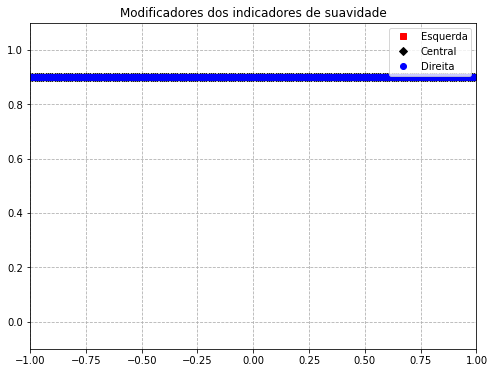

In [28]:
des_f=lambda y: y#/np.sqrt(np.var(y))#-np.log(1/y-1)
create_compara_plot(x,des_f(δ_plot[2:]),['Modificadores dos indicadores de suavidade'],is_log=False,hlines=False,ylim=(-0.1,1.1))
#plt.savefig('imagens/modificadores geral conv3 zoomed.png')

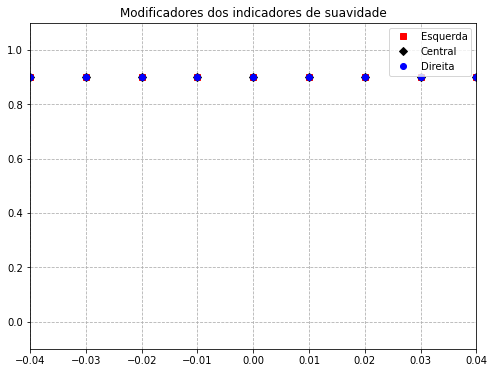

In [29]:
create_compara_plot(x,des_f(δ_plot[2:]),['Modificadores dos indicadores de suavidade'],is_log=False,hlines=False,xlim=(-0.04,0.04),ylim=(-0.1,1.1))